# EDA and Feature Engineering Flight Price Prediction

In [736]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re # Regular expression library


%matplotlib inline

In [737]:
df = pd.read_excel('flight_price.xlsx')

In [738]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [739]:
df.tail()

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [740]:
df.shape

(10683, 11)

In [741]:
## Get the basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [742]:
## Given most of the columns are object type, we are only getting Price column
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

## Feature Engineering

In [743]:
## Dealing with dates columns
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [744]:
## The above values are still objects, we need to convert to numerical format
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [745]:
# Drop Date Of Journey column
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [747]:
# Feature Engineering on Arrival Hour
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [748]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]

In [749]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)

In [750]:
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_Hour     10683 non-null  int64 
 13  Arrival_Minute   10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [752]:
# Feature Engineering on Departure Time
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [753]:
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)

In [754]:
df.drop(['Dep_Time'], axis=1, inplace=True)

In [755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Date              10683 non-null  int64 
 9   Month             10683 non-null  int64 
 10  Year              10683 non-null  int64 
 11  Arrival_Hour      10683 non-null  int64 
 12  Arrival_Minute    10683 non-null  int64 
 13  Departure_Hour    10683 non-null  int64 
 14  Departure_Minute  10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [756]:
df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Date  Month  Year  Arrival_Hour  \
0    non-stop         No info   3897    24      3  2019             1   
1     2 stops         No info   7662     1      5  2019            13   
2     2 stops         No info  13882     9      6  2019             4   
3      1 stop         No info   6218    12      5  2019            23   
4      1 stop         No info  13302     1      3  2019            21   

   Arrival_Minute  Departure_Hour  Departure_Minute  
0              10              22                20  
1              15               5                50  
2              25               9                25  
3              30              18                 5  
4              35              16                50

In [757]:
## Feature Engineering on Duration
## List all the formats of Duration
df['Duration'].apply(lambda x:re.sub(r'\d+', '', x)).unique()

array(['h m', 'h', 'm'], dtype=object)

In [758]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

Conclusion - The formats are:

1. `01h 1m`
2. `10h`
3. `10m`

Formula to convert hours to minutes:

`hour * 60 minutes`

In [759]:
def duration_to_minutes(duration):
    hours = 0
    minutes = 0
    
    hours_match = re.search(r'(\d+)h', duration)
    if hours_match:
        hours = int(hours_match.group(1))
    
    minutes_match = re.search(r'(\d+)m', duration)
    if minutes_match:
        minutes = int(minutes_match.group(1))
    
    return hours * 60 + minutes

In [760]:
## Check missing values
df[df['Total_Stops'].isnull()]


Airline Source Destination Route Duration Total_Stops Additional_Info  \
9039  Air India  Delhi      Cochin   NaN  23h 40m         NaN         No info   

      Price  Date  Month  Year  Arrival_Hour  Arrival_Minute  Departure_Hour  \
9039   7480     6      5  2019             9              25               9   

      Departure_Minute  
9039                45

In [761]:
df[df['Duration'].apply(lambda x:duration_to_minutes(x)).isnull()]

Empty DataFrame
Columns: [Airline, Source, Destination, Route, Duration, Total_Stops, Additional_Info, Price, Date, Month, Year, Arrival_Hour, Arrival_Minute, Departure_Hour, Departure_Minute]
Index: []

In [762]:
df['Duration'].apply(lambda x:duration_to_minutes(x)).isnull().sum()

0

In [763]:
df['Duration'] = df['Duration'].apply(lambda x:duration_to_minutes(x))

In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  int64 
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Date              10683 non-null  int64 
 9   Month             10683 non-null  int64 
 10  Year              10683 non-null  int64 
 11  Arrival_Hour      10683 non-null  int64 
 12  Arrival_Minute    10683 non-null  int64 
 13  Departure_Hour    10683 non-null  int64 
 14  Departure_Minute  10683 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


In [765]:
df.head()

Airline    Source Destination                  Route  Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL       170   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR       445   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      1140   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR       325   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL       285   

  Total_Stops Additional_Info  Price  Date  Month  Year  Arrival_Hour  \
0    non-stop         No info   3897    24      3  2019             1   
1     2 stops         No info   7662     1      5  2019            13   
2     2 stops         No info  13882     9      6  2019             4   
3      1 stop         No info   6218    12      5  2019            23   
4      1 stop         No info  13302     1      3  2019            21   

   Arrival_Minute  Departure_Hour  Departure_Minute  
0              10              22                20  
1              15               5                50  
2              25               9                25  
3              30              18                 5  
4              35              16                50

In [766]:
## Feature Engineering on Total Stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [767]:
df[df['Total_Stops'].isnull()]

Airline Source Destination Route  Duration Total_Stops  \
9039  Air India  Delhi      Cochin   NaN      1420         NaN   

     Additional_Info  Price  Date  Month  Year  Arrival_Hour  Arrival_Minute  \
9039         No info   7480     6      5  2019             9              25   

      Departure_Hour  Departure_Minute  
9039               9                45

In [768]:
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0, 
    '1 stop': 1, 
    '2 stops': 2, 
    '3 stops': 3, 
    '4 stops': 4,
    np.nan: 1
    })

In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  int64 
 5   Total_Stops       10683 non-null  int64 
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Date              10683 non-null  int64 
 9   Month             10683 non-null  int64 
 10  Year              10683 non-null  int64 
 11  Arrival_Hour      10683 non-null  int64 
 12  Arrival_Minute    10683 non-null  int64 
 13  Departure_Hour    10683 non-null  int64 
 14  Departure_Minute  10683 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [770]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [771]:
df[df['Total_Stops'].isnull()]

Empty DataFrame
Columns: [Airline, Source, Destination, Route, Duration, Total_Stops, Additional_Info, Price, Date, Month, Year, Arrival_Hour, Arrival_Minute, Departure_Hour, Departure_Minute]
Index: []

In [772]:
df.head()

Airline    Source Destination                  Route  Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL       170   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR       445   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      1140   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR       325   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL       285   

   Total_Stops Additional_Info  Price  Date  Month  Year  Arrival_Hour  \
0            0         No info   3897    24      3  2019             1   
1            2         No info   7662     1      5  2019            13   
2            2         No info  13882     9      6  2019             4   
3            1         No info   6218    12      5  2019            23   
4            1         No info  13302     1      3  2019            21   

   Arrival_Minute  Departure_Hour  Departure_Minute  
0              10              22                20  
1              15               5                50  
2              25               9                25  
3              30              18                 5  
4              35              16                50

In [773]:
## Feature Engineering on Route
## We can drop the Route column because we also have Source and Destination columns
df.drop(['Route'], axis=1, inplace=True)

In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Duration          10683 non-null  int64 
 4   Total_Stops       10683 non-null  int64 
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   Date              10683 non-null  int64 
 8   Month             10683 non-null  int64 
 9   Year              10683 non-null  int64 
 10  Arrival_Hour      10683 non-null  int64 
 11  Arrival_Minute    10683 non-null  int64 
 12  Departure_Hour    10683 non-null  int64 
 13  Departure_Minute  10683 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 1.1+ MB


In [775]:
df.head()

Airline    Source Destination  Duration  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi       170            0         No info   
1    Air India   Kolkata    Banglore       445            2         No info   
2  Jet Airways     Delhi      Cochin      1140            2         No info   
3       IndiGo   Kolkata    Banglore       325            1         No info   
4       IndiGo  Banglore   New Delhi       285            1         No info   

   Price  Date  Month  Year  Arrival_Hour  Arrival_Minute  Departure_Hour  \
0   3897    24      3  2019             1              10              22   
1   7662     1      5  2019            13              15               5   
2  13882     9      6  2019             4              25               9   
3   6218    12      5  2019            23              30              18   
4  13302     1      3  2019            21              35              16   

   Departure_Minute  
0                20  
1                50  
2                25  
3                 5  
4                50

In [776]:
## Feature Engineering on Airline, Source, Destination, and Additional_Info
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [777]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [778]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [779]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [780]:
from sklearn.preprocessing import OneHotEncoder

In [781]:
encoder = OneHotEncoder()

In [782]:
encoder.fit_transform(df[['Airline', 'Source', 'Destination', 'Additional_Info']]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [783]:
pd.DataFrame(encoder.fit_transform(df[['Airline', 'Source', 'Destination', 'Additional_Info']]).toarray(), columns = encoder.get_feature_names_out())

Airline_Air Asia  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0                   0.0                0.0            0.0             1.0   
1                   0.0                1.0            0.0             0.0   
2                   0.0                0.0            0.0             0.0   
3                   0.0                0.0            0.0             1.0   
4                   0.0                0.0            0.0             1.0   
...                 ...                ...            ...             ...   
10678               1.0                0.0            0.0             0.0   
10679               0.0                1.0            0.0             0.0   
10680               0.0                0.0            0.0             0.0   
10681               0.0                0.0            0.0             0.0   
10682               0.0                1.0            0.0             0.0   

       Airline_Jet Airways  Airline_Jet Airways Business  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      1.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   
...                    ...                           ...   
10678                  0.0                           0.0   
10679                  0.0                           0.0   
10680                  1.0                           0.0   
10681                  0.0                           0.0   
10682                  0.0                           0.0   

       Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                            0.0                                        0.0   
1                            0.0                                        0.0   
2                            0.0                                        0.0   
3                            0.0                                        0.0   
4                            0.0                                        0.0   
...                          ...                                        ...   
10678                        0.0                                        0.0   
10679                        0.0                                        0.0   
10680                        0.0                                        0.0   
10681                        0.0                                        0.0   
10682                        0.0                                        0.0   

       Airline_SpiceJet  Airline_Trujet  ...  Additional_Info_1 Long layover  \
0                   0.0             0.0  ...                             0.0   
1                   0.0             0.0  ...                             0.0   
2                   0.0             0.0  ...                             0.0   
3                   0.0             0.0  ...                             0.0   
4                   0.0             0.0  ...                             0.0   
...                 ...             ...  ...                             ...   
10678               0.0             0.0  ...                             0.0   
10679               0.0             0.0  ...                             0.0   
10680               0.0             0.0  ...                             0.0   
10681               0.0             0.0  ...                             0.0   
10682               0.0             0.0  ...                             0.0   

       Additional_Info_1 Short layover  Additional_Info_2 Long layover  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   
...    

In [784]:
## Merge the one hot encoded columns with the original dataframe
df = pd.concat([df, pd.DataFrame(encoder.fit_transform(df[['Airline', 'Source', 'Destination', 'Additional_Info']]).toarray(), columns = encoder.get_feature_names_out())], axis=1)

In [785]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline                                       10683 non-null  object 
 1   Source                                        10683 non-null  object 
 2   Destination                                   10683 non-null  object 
 3   Duration                                      10683 non-null  int64  
 4   Total_Stops                                   10683 non-null  int64  
 5   Additional_Info                               10683 non-null  object 
 6   Price                                         10683 non-null  int64  
 7   Date                                          10683 non-null  int64  
 8   Month                                         10683 non-null  int64  
 9   Year                                          10683 non-null 

In [786]:
df.head()

Airline    Source Destination  Duration  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi       170            0         No info   
1    Air India   Kolkata    Banglore       445            2         No info   
2  Jet Airways     Delhi      Cochin      1140            2         No info   
3       IndiGo   Kolkata    Banglore       325            1         No info   
4       IndiGo  Banglore   New Delhi       285            1         No info   

   Price  Date  Month  Year  ...  Additional_Info_1 Long layover  \
0   3897    24      3  2019  ...                             0.0   
1   7662     1      5  2019  ...                             0.0   
2  13882     9      6  2019  ...                             0.0   
3   6218    12      5  2019  ...                             0.0   
4  13302     1      3  2019  ...                             0.0   

   Additional_Info_1 Short layover  Additional_Info_2 Long layover  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                              0.0                             0.0   

   Additional_Info_Business class  Additional_Info_Change airports  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   Additional_Info_In-flight meal not included  Additional_Info_No Info  \
0                                          0.0                      0.0   
1                                          0.0                      0.0   
2                                          0.0                      0.0   
3                                          0.0                      0.0   
4                                          0.0                      0.0   

   Additional_Info_No check-in baggage included  Additional_Info_No info  \
0                                           0.0                      1.0   
1                                           0.0                      1.0   
2                                           0.0                      1.0   
3                                           0.0                      1.0   
4                                           0.0                      1.0   

   Additional_Info_Red-eye flight  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 47 columns]

In [787]:
## Finaly, drop the Airline, Source, Destination, and Additional_Info columns
df.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1, inplace=True)

In [788]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Duration                                      10683 non-null  int64  
 1   Total_Stops                                   10683 non-null  int64  
 2   Price                                         10683 non-null  int64  
 3   Date                                          10683 non-null  int64  
 4   Month                                         10683 non-null  int64  
 5   Year                                          10683 non-null  int64  
 6   Arrival_Hour                                  10683 non-null  int64  
 7   Arrival_Minute                                10683 non-null  int64  
 8   Departure_Hour                                10683 non-null  int64  
 9   Departure_Minute                              10683 non-null 

In [789]:
df.head()

Duration  Total_Stops  Price  Date  Month  Year  Arrival_Hour  \
0       170            0   3897    24      3  2019             1   
1       445            2   7662     1      5  2019            13   
2      1140            2  13882     9      6  2019             4   
3       325            1   6218    12      5  2019            23   
4       285            1  13302     1      3  2019            21   

   Arrival_Minute  Departure_Hour  Departure_Minute  ...  \
0              10              22                20  ...   
1              15               5                50  ...   
2              25               9                25  ...   
3              30              18                 5  ...   
4              35              16                50  ...   

   Additional_Info_1 Long layover  Additional_Info_1 Short layover  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   Additional_Info_2 Long layover  Additional_Info_Business class  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   Additional_Info_Change airports  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   

   Additional_Info_In-flight meal not included  Additional_Info_No Info  \
0                                          0.0                      0.0   
1                                          0.0                      0.0   
2                                          0.0                      0.0   
3                                          0.0                      0.0   
4                                          0.0                      0.0   

   Additional_Info_No check-in baggage included  Additional_Info_No info  \
0                                           0.0                      1.0   
1                                           0.0                      1.0   
2                                           0.0                      1.0   
3                                           0.0                      1.0   
4                                           0.0                      1.0   

   Additional_Info_Red-eye flight  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 43 columns]

## EDA

In [790]:
df.describe()

Duration   Total_Stops         Price          Date         Month  \
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.000000   
mean     643.093232      0.824207   9087.064121     13.508378      4.708602   
std      507.862001      0.675199   4611.359167      8.479277      1.164357   
min        5.000000      0.000000   1759.000000      1.000000      3.000000   
25%      170.000000      0.000000   5277.000000      6.000000      3.000000   
50%      520.000000      1.000000   8372.000000     12.000000      5.000000   
75%      930.000000      1.000000  12373.000000     21.000000      6.000000   
max     2860.000000      4.000000  79512.000000     27.000000      6.000000   

          Year  Arrival_Hour  Arrival_Minute  Departure_Hour  \
count  10683.0  10683.000000    10683.000000    10683.000000   
mean    2019.0     13.348778       24.690630       12.490686   
std        0.0      6.859125       16.506036        5.748650   
min     2019.0      0.000000        0.000000        0.000000   
25%     2019.0      8.000000       10.000000        8.000000   
50%     2019.0     14.000000       25.000000       11.000000   
75%     2019.0     19.000000       35.000000       18.000000   
max     2019.0     23.000000       55.000000       23.000000   

       Departure_Minute  ...  Additional_Info_1 Long layover  \
count      10683.000000  ...                    10683.000000   
mean          24.411214  ...                        0.001779   
std           18.767980  ...                        0.042137   
min            0.000000  ...                        0.000000   
25%            5.000000  ...                        0.000000   
50%           25.000000  ...                        0.000000   
75%           40.000000  ...                        0.000000   
max           55.000000  ...                        1.000000   

       Additional_Info_1 Short layover  Additional_Info_2 Long layover  \
count                     10683.000000                    10683.000000   
mean                          0.000094                        0.000094   
std                           0.009675                        0.009675   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                           0.000000                        0.000000   
max                           1.000000                        1.000000   

       Additional_Info_Business class  Additional_Info_Change airports  \
count                    10683.000000                     10683.000000   
mean                         0.000374                         0.000655   
std                          0.019347                         0.025591   
min                          0.000000                         0.000000   
25%                          0.000000                         0.000000   
50%                          0.000000                         0.000000   
75%                          0.000000                         0.000000   
max                          1.000000                         1.000000   

       Additional_Info_In-flight meal not included  Additional_Info_No Info  \
count                                 10683.000000             10683.000000   
mean                                      0.185528                 0.000281   
std                                       0.388744                 0.016756   
min                                       0.000000                 0.000000   
25%                                       0.000000                 0.000000   
50%                                       0.000000                 0.000000   
75%                                       0.000000                 0.000000   
max                                       1.000000                 1.000000   

       Additional_Info_No check-in baggage included  Additional_Info_No info  \
count              

In [791]:
df.shape

(10683, 43)

In [792]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Date', 'Month', 'Year',
       'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_N

In [793]:
# Find duplicate records
df[df.duplicated()]

Duration  Total_Stops  Price  Date  Month  Year  Arrival_Hour  \
683         830            2  13376     1      6  2019             4   
1061       1275            2  10231    21      5  2019            19   
1348       1560            2  12392    18      5  2019            19   
1418       1375            2  10368     6      6  2019             4   
1674        175            0   7303    24      3  2019            21   
...         ...          ...    ...   ...    ...   ...           ...   
10594       810            2  12819    27      6  2019            12   
10616      1615            2  13014     1      6  2019            12   
10634      1615            2  11733     6      6  2019            12   
10672      1195            2  11150    27      6  2019            19   
10673       900            2  16704    27      5  2019             4   

       Arrival_Minute  Departure_Hour  Departure_Minute  ...  \
683                25              14                35  ...   
1061               15              22                 0  ...   
1348               15              17                15  ...   
1418               25               5                30  ...   
1674               20              18                25  ...   
...               ...             ...               ...  ...   
10594              35              23                 5  ...   
10616              35               9                40  ...   
10634              35               9                40  ...   
10672               0              23                 5  ...   
10673              25              13                25  ...   

       Additional_Info_1 Long layover  Additional_Info_1 Short layover  \
683                               0.0                              0.0   
1061                              0.0                              0.0   
1348                              0.0                              0.0   
1418                              0.0                              0.0   
1674                              0.0                              0.0   
...                               ...                              ...   
10594                             0.0                              0.0   
10616                             0.0                              0.0   
10634                             0.0                              0.0   
10672                             0.0                              0.0   
10673                             0.0                              0.0   

       Additional_Info_2 Long layover  Additional_Info_Business class  \
683                               0.0                             0.0   
1061                              0.0                             0.0   
1348                              0.0                             0.0   
1418                              0.0                             0.0   
1674                              0.0                             0.0   
...                               ...                             ...   
10594                             0.0                             0.0   
10616                             0.0                             0.0   
10634                             0.0                             0.0   
10672                             0.0                             0.0   
10673                             0.0                             0.0   

       Additional_Info_Change airports  \
683                                0.0   
1061                               0.0   
1348                               0.0   
1418                               0.0   
1674                               0.0   
...                                ...   
10594                              0.0   
10616                              0.0   
10634                              0.0   
10672                              0.0   
10673                              0.0   

       Additional_Info_In-flight meal not included  Additional_Info_No Info  \
683                    

In [794]:
## Removing the duplicate records
df.drop_duplicates(inplace=True)

In [795]:
df.shape

(10461, 43)

In [796]:
## Correlation
plt.figure(figsize=(100, 100))
sns.heatmap(df.corr(), annot=True)

<Axes: >

In [797]:
## Visualization
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Date', 'Month', 'Year',
       'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_N

In [801]:
plt.figure(figsize=(100, 100))
df.Duration.value_counts().plot(kind='bar')

<Axes: xlabel='Duration'>

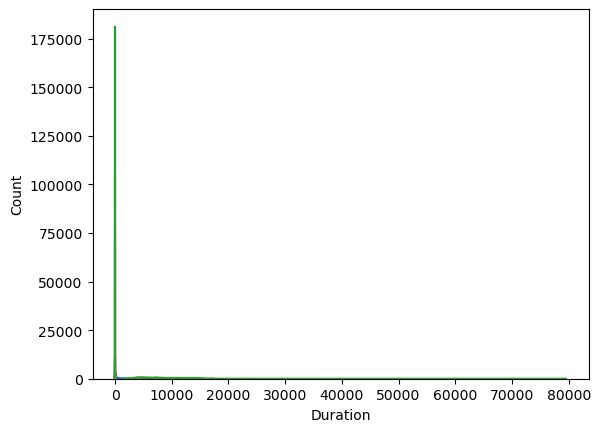

In [802]:
for column in df.columns:
    sns.histplot(df[column], kde=True)

<Axes: xlabel='Duration', ylabel='Count'>

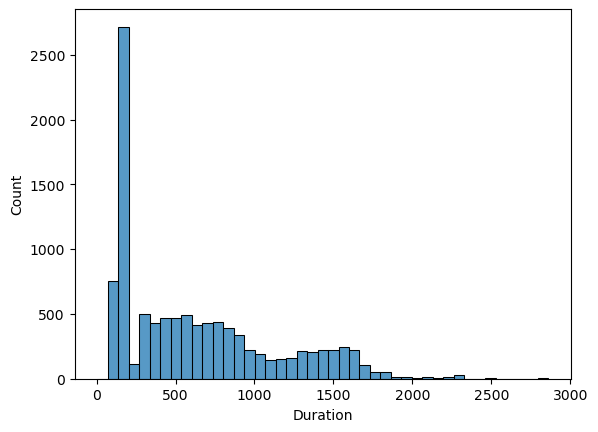

In [803]:
sns.histplot(df['Duration'])

In [804]:
# Univariate, bivariate, and multivariate analysis
sns.pairplot(df)

<Axes: xlabel='Duration', ylabel='Total_Stops'>

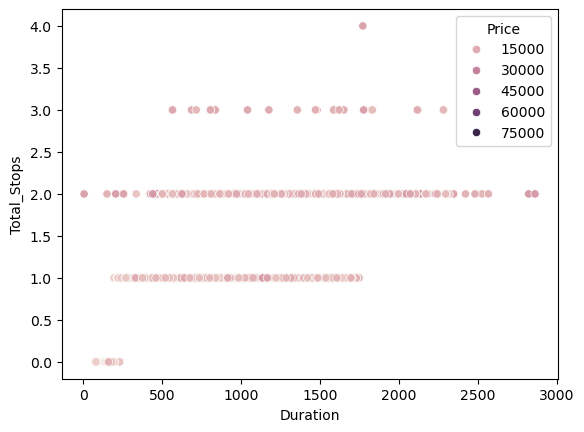

In [806]:
sns.scatterplot(x='Duration', y='Total_Stops', hue='Price', data=df)

<Axes: xlabel='Duration', ylabel='Price'>

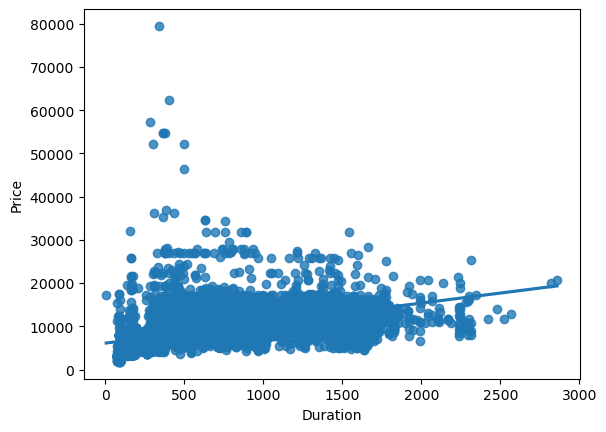

In [808]:
sns.regplot(x='Duration', y='Price', data=df)